# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Yao Chun Hsieh
    Nathan Hsu
    Yuchen Shen
    Yang Tao
    Ying Fang

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
"""Script to download the movie review dataset"""

import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

Decompressing review_polarity.tar.gz


0 params - {'vect__ngram_range': (1, 2)}; mean - 0.82; std - 0.00
             precision    recall  f1-score   support

        neg       0.87      0.85      0.86       254
        pos       0.85      0.87      0.86       246

avg / total       0.86      0.86      0.86       500

[[216  38]
 [ 32 214]]


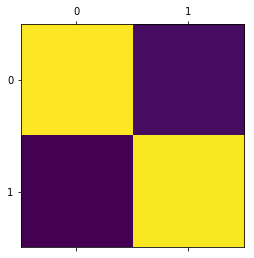

In [2]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as first argument
movie_reviews_data_folder = 'txt_sentoken'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
dataset.target = list(dataset.target)

# split the dataset in training and test set:
docs_train, docs_test, target_train, target_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=0)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=0.01, max_df=0.90)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1,2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, target_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
target_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(cm)

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [3]:
print("  TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus." +
      "\n  The tf-idf value increases proportionally to the number of times a word appears in the document, but is often offset by the frequency" +
      "\nof the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.") 
print("  TF(Term Frequency): The number of times a term occurs in a document is called its term frequency.") 
print("  IDF(Inverse Docuemnt Frequency): It is a measure of how much information the word provides, that is, whether the term is common or rare" +
      "\nacross all documents.")

  TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
  The tf-idf value increases proportionally to the number of times a word appears in the document, but is often offset by the frequency
of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.
  TF(Term Frequency): The number of times a term occurs in a document is called its term frequency.
  IDF(Inverse Docuemnt Frequency): It is a measure of how much information the word provides, that is, whether the term is common or rare
across all documents.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus=docs_train

X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
print (word)
print (X.toarray())
len(word)

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10b', '10s', '10th', '11', '110', '111', '112', '113', '115', '117', '118', '11th', '12', '121', '122', '126', '127', '128', '129', '12th', '13', '130', '131', '132', '137', '139', '13th', '14', '140', '1400', '143', '14th', '15', '150', '150th', '151', '152', '1521', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '1600s', '161', '165', '1692', '16mm', '16th', '16x9', '17', '170', '1709', '172', '175', '1773', '1792', '1793', '1794', '1799', '17th', '18', '180', '1800', '1800s', '1812', '1830s', '1839', '1847', '1862', '1865', '1869', '1871', '1885', '1888', '1898', '1899', '18s', '18th', '19', '1900', '1900s', '1903', '1912', '1913', '1914', '1916', '1919', '1920s', '1922', '1923', '1925', '1928', '1930', '1930s', '1932', '1933', '1934', '1935', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', 

[[ 0.          0.02829417  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.06598304  0.         ...,  0.          0.          0.        ]]


35321

In [5]:
print('min_df: %f \nmax_df: %f '% (X.min(),X.max()))

min_df: 0.000000 
max_df: 0.790586 


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.1,max_df=0.7)
corpus=docs_train

Y = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
print (word)
print (Y.toarray())

['able', 'act', 'acting', 'action', 'actor', 'actors', 'actually', 'after', 'again', 'against', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'american', 'another', 'any', 'anyone', 'anything', 'appears', 'aren', 'around', 'attempt', 'attention', 'audience', 'away', 'back', 'bad', 'based', 'beautiful', 'because', 'become', 'becomes', 'been', 'before', 'beginning', 'begins', 'behind', 'being', 'believe', 'best', 'better', 'between', 'big', 'bit', 'black', 'body', 'book', 'boring', 'both', 'boy', 'bring', 'called', 'camera', 'can', 'car', 'care', 'career', 'case', 'cast', 'certainly', 'character', 'characters', 'children', 'city', 'classic', 'close', 'co', 'come', 'comedy', 'comes', 'comic', 'coming', 'completely', 'could', 'couple', 'course', 'dark', 'daughter', 'david', 'day', 'days', 'dead', 'death', 'despite', 'dialogue', 'did', 'didn', 'different', 'directed', 'direction', 'director', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'drama', 'during', 'e

In [7]:
print("  From the above result, it is clear that when we add the parameters 'min_df=0.1,max_df=0.7' of TfidVectorizer, the result is " +
      "\nfar less than before.")
print("  min_df means when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold." +
      "\nWhen we define min_df=0.1, which means our result will eliminate vocabularies whose document frequency is lower than 0.1.")
print("  max_df means when building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold." +
      "\nWhen we define max_df=0.7, which means our result will eliminate vocabularies whose document frequency is higher than 0.7.")
print("  Thus, resluts like '00', '000', '0009f' in former part have been deleted, whose document frequency must lower than 0.1 or higher"+
      "\nthan 0.7.")

  From the above result, it is clear that when we add the parameters 'min_df=0.1,max_df=0.7' of TfidVectorizer, the result is 
far less than before.
  min_df means when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
When we define min_df=0.1, which means our result will eliminate vocabularies whose document frequency is lower than 0.1.
  max_df means when building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.
When we define max_df=0.7, which means our result will eliminate vocabularies whose document frequency is higher than 0.7.
  Thus, resluts like '00', '000', '0009f' in former part have been deleted, whose document frequency must lower than 0.1 or higher
than 0.7.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.1,ngram_range=(0,4))
corpus=docs_train

Z = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
print (word)
print (Z.toarray())

['', 'able', 'able to', 'about', 'about the', 'act', 'acting', 'action', 'actor', 'actors', 'actually', 'after', 'after the', 'again', 'against', 'all', 'all of', 'all the', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'american', 'an', 'and', 'and even', 'and he', 'and his', 'and in', 'and is', 'and it', 'and that', 'and the', 'and then', 'another', 'any', 'anyone', 'anything', 'appears', 'are', 'are the', 'aren', 'around', 'as', 'as an', 'as he', 'as if', 'as it', 'as the', 'as they', 'as well', 'at', 'at all', 'at least', 'at the', 'attempt', 'attention', 'audience', 'away', 'back', 'back to', 'bad', 'based', 'based on', 'be', 'be the', 'beautiful', 'because', 'because it', 'because of', 'become', 'becomes', 'been', 'before', 'beginning', 'begins', 'behind', 'being', 'believe', 'best', 'better', 'between', 'between the', 'big', 'bit', 'black', 'body', 'book', 'boring', 'both', 'boy', 'bring', 'but', 'but he', 'but it', 'but the', 'by', 'by the', 'called', 'ca

In [9]:
print("  This time, we add parameters 'min_df=0.1, ngram_range=(0,4)' of TfidVectorizer.")
print("  ngram_range extracts the lower and upper boundary of the range of n-values for different n-grams. Thus, in this part," +
      "\nall 1<=values<=4 were used. Compare to the former results, we now get values with vocabularies from one to four. We can "+
      "\nfind 'the rest', 'the rest of', 'the rest of the' in this part, which cannot be found in former parts that had default"+
      "\nngram_range with only one vocabulary.")

  This time, we add parameters 'min_df=0.1, ngram_range=(0,4)' of TfidVectorizer.
  ngram_range extracts the lower and upper boundary of the range of n-values for different n-grams. Thus, in this part,
all 1<=values<=4 were used. Compare to the former results, we now get values with vocabularies from one to four. We can 
find 'the rest', 'the rest of', 'the rest of the' in this part, which cannot be found in former parts that had default
ngram_range with only one vocabulary.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = TfidfVectorizer(docs_train,min_df=0.10, max_df=0.70,ngram_range = (1,4),analyzer ='word')
x.fit(docs_train)
y = x.get_feature_names()
print(y) 
print(len(y))
with open("0.1-0.7.txt","w") as output:
    output.write(str(y))

['able', 'able to', 'about the', 'act', 'acting', 'action', 'actor', 'actors', 'actually', 'after', 'after the', 'again', 'against', 'all of', 'all the', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'american', 'and even', 'and he', 'and his', 'and in', 'and is', 'and it', 'and that', 'and the', 'and then', 'another', 'any', 'anyone', 'anything', 'appears', 'are the', 'aren', 'around', 'as an', 'as he', 'as if', 'as it', 'as the', 'as they', 'as well', 'at all', 'at least', 'at the', 'attempt', 'attention', 'audience', 'away', 'back', 'back to', 'bad', 'based', 'based on', 'be the', 'beautiful', 'because', 'because it', 'because of', 'become', 'becomes', 'been', 'before', 'beginning', 'begins', 'behind', 'being', 'believe', 'best', 'better', 'between', 'between the', 'big', 'bit', 'black', 'body', 'book', 'boring', 'both', 'boy', 'bring', 'but he', 'but it', 'but the', 'by the', 'called', 'camera', 'can', 'can be', 'car', 'care', 'career', 'case', 'cast', 'certa

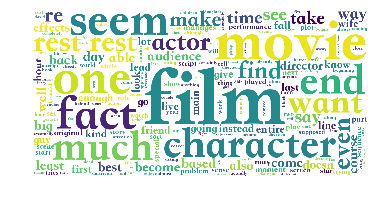

In [31]:
import  matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

text_from_file_with_apath =open("/Users/ying/2017Fall/DS501/0.1-0.7.txt",encoding="UTF-8").read()

wordlist_after_jieba =jieba.cut(text_from_file_with_apath,cut_all=True)

wl_space_split =" ".join(wordlist_after_jieba)

my_wordcloud =WordCloud(font_path="/Library/Fonts/Songti.ttc",background_color="white",width=1000,height=500).generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file(os.path.join("/Users/ying/2017Fall/DS501/0.1-0.7.png"))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = TfidfVectorizer(docs_train,min_df=0.25, max_df=0.60,ngram_range = (1,4),analyzer ='word')
x.fit(docs_train)
y = x.get_feature_names()
print(y) 
print(len(y))
with open("0.25-0.60.txt","w") as output:
    output.write(str(y))

['acting', 'action', 'actors', 'actually', 'after', 'again', 'all the', 'almost', 'also', 'although', 'and his', 'another', 'any', 'around', 'as the', 'at the', 'audience', 'away', 'back', 'bad', 'because', 'been', 'before', 'being', 'best', 'better', 'between', 'big', 'both', 'but it', 'but the', 'by the', 'cast', 'character', 'characters', 'come', 'comedy', 'comes', 'could', 'did', 'director', 'do', 'does', 'doesn', 'don', 'down', 'end', 'enough', 'ever', 'every', 'fact', 'few', 'film is', 'films', 'find', 'first', 'for the', 'from the', 'funny', 'get', 'gets', 'go', 'goes', 'going', 'good', 'great', 'had', 'have been', 'he is', 'her', 'here', 'him', 'how', 'however', 'if you', 'in this', 'into the', 'is not', 'is that', 'is the', 'isn', 'it is', 'its', 'know', 'last', 'least', 'life', 'little', 'long', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'may', 'me', 'most', 'movies', 'much', 'my', 'never', 'new', 'nothing', 'now', 'of his', 'of the film', 'of this', 'off'

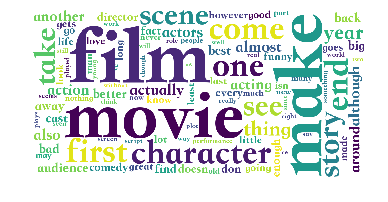

In [32]:
import  matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

text_from_file_with_apath =open("/Users/ying/2017Fall/DS501/0.25-0.60.txt",encoding="UTF-8").read()

wordlist_after_jieba =jieba.cut(text_from_file_with_apath,cut_all=True)
from sklearn.feature_extraction.text import TfidfVectorizer

x = TfidfVectorizer(docs_train,min_df=0.25, max_df=0.60,ngram_range = (1,4),analyzer ='word')
x.fit(docs_train)
y = x.get_feature_names()
print(y) 
print(len(y))
with open("0.25-0.60.txt","w") as output:
    output.write(str(y))
wl_space_split =" ".join(wordlist_after_jieba)

my_wordcloud =WordCloud(font_path="/Library/Fonts/Songti.ttc",background_color="white",width=1000,height=500).generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file(os.path.join("/Users/ying/2017Fall/DS501/0.25-0.60.png"))

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [9]:
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
kf = KFold(n=len(dataset.target), n_folds=10, shuffle=True, random_state=None)
l = []
count=0
for train_index, test_index in kf:
    docs_train, target_train = np.array(dataset.data)[train_index], np.array(dataset.target)[train_index]
    docs_test, target_test = np.array(dataset.data)[test_index], np.array(dataset.target)[test_index]
    s = 0
    L=[]
    for i in np.arange(0.1, 1, 0.1):
        Tfidf = TfidfVectorizer(min_df=i, max_df=1.0, ngram_range = (1,2),analyzer ='word')
        Tfidf.fit(docs_train)
        Xtrain = Tfidf.transform(docs_train)
        Xtest = Tfidf.transform(docs_test)
        clf = LinearSVC(C = 1, random_state=0)
        clf.fit(Xtrain, target_train)
        if s <= clf.score(Xtest, target_test):
            s = clf.score(Xtest, target_test)
            L.append([s,i])
    l.append(L[-1])
print(l)
total = 0
for i in l:
    total = i[1]+total
print(total/10)

[[0.81000000000000005, 0.10000000000000001], [0.84499999999999997, 0.20000000000000001], [0.76500000000000001, 0.20000000000000001], [0.80500000000000005, 0.10000000000000001], [0.81499999999999995, 0.10000000000000001], [0.80500000000000005, 0.10000000000000001], [0.80000000000000004, 0.20000000000000001], [0.79500000000000004, 0.10000000000000001], [0.79500000000000004, 0.10000000000000001], [0.82999999999999996, 0.10000000000000001]]
0.13


In [10]:
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
kf = KFold(n=len(dataset.target), n_folds=10, shuffle=True, random_state=None)
l = []
count=0
for train_index, test_index in kf:
    docs_train, target_train = np.array(dataset.data)[train_index], np.array(dataset.target)[train_index]
    docs_test, target_test = np.array(dataset.data)[test_index], np.array(dataset.target)[test_index]
    s = 0
    L=[]
    for i in np.arange(0.01, 0.13, 0.01):
        Tfidf = TfidfVectorizer(min_df=i, max_df=1.0, ngram_range = (1,2),analyzer ='word')
        Tfidf.fit(docs_train)
        Xtrain = Tfidf.transform(docs_train)
        Xtest = Tfidf.transform(docs_test)
        clf = LinearSVC(C = 1, random_state=0)
        clf.fit(Xtrain, target_train)
        if s <= clf.score(Xtest, target_test):
            s = clf.score(Xtest, target_test)
            L.append([s,i])
    l.append(L[-1])
print(l)
total = 0
for i in l:
    total = i[1]+total
print(total/10)

[[0.88, 0.02], [0.90500000000000003, 0.01], [0.89500000000000002, 0.01], [0.84999999999999998, 0.050000000000000003], [0.86499999999999999, 0.029999999999999999], [0.83999999999999997, 0.029999999999999999], [0.83999999999999997, 0.01], [0.875, 0.01], [0.87, 0.01], [0.89500000000000002, 0.02]]
0.02


<IPython.core.display.Javascript object>


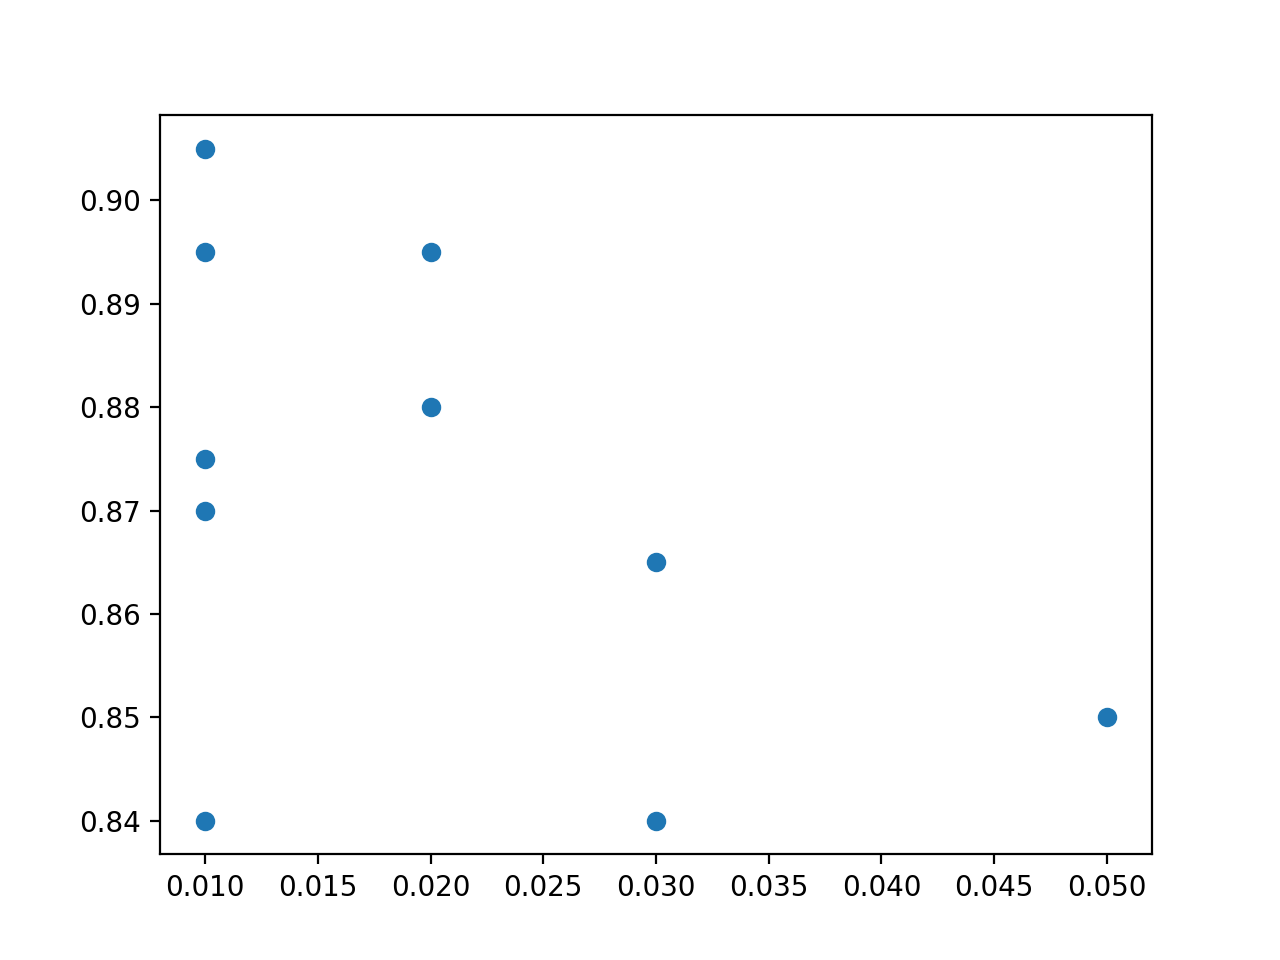

In [14]:
%matplotlib notebook
from matplotlib import pyplot as plt
L = [[0.88, 0.02], [0.90500000000000003, 0.01], [0.89500000000000002, 0.01], [0.84999999999999998, 0.050000000000000003], [0.86499999999999999, 0.029999999999999999], [0.83999999999999997, 0.029999999999999999], [0.83999999999999997, 0.01], [0.875, 0.01], [0.87, 0.01], [0.89500000000000002, 0.02]]
L1 = []
L2 = []
for i in L:
    L1.append(i[0])
    L2.append(i[1])
plt.figure()
plt.plot(L2,L1,'o')

In [12]:
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
kf = KFold(n=len(dataset.target), n_folds=10, shuffle=True, random_state=None)
l = []
count=0
for train_index, test_index in kf:
    docs_train, target_train = np.array(dataset.data)[train_index], np.array(dataset.target)[train_index]
    docs_test, target_test = np.array(dataset.data)[test_index], np.array(dataset.target)[test_index]
    s = 0
    L=[]
    for i in np.arange(0.1, 1.1, 0.1):
        Tfidf = TfidfVectorizer(min_df=0.01, max_df=i, ngram_range = (1,2),analyzer ='word')
        Tfidf.fit(docs_train)
        Xtrain = Tfidf.transform(docs_train)
        Xtest = Tfidf.transform(docs_test)
        clf = LinearSVC(C = 1, random_state=0)
        clf.fit(Xtrain, target_train)
        if s <= clf.score(Xtest, target_test):
            s = clf.score(Xtest, target_test)
            L.append([s,i])
    l.append(L[-1])
print(l)
total = 0
for i in l:
    total = i[1]+total
print(total/10)

[[0.85999999999999999, 1.0], [0.87, 0.80000000000000004], [0.90000000000000002, 0.70000000000000007], [0.88500000000000001, 0.70000000000000007], [0.875, 0.80000000000000004], [0.92500000000000004, 0.80000000000000004], [0.85999999999999999, 1.0], [0.87, 0.30000000000000004], [0.89000000000000001, 1.0], [0.85499999999999998, 0.30000000000000004]]
0.74


<IPython.core.display.Javascript object>


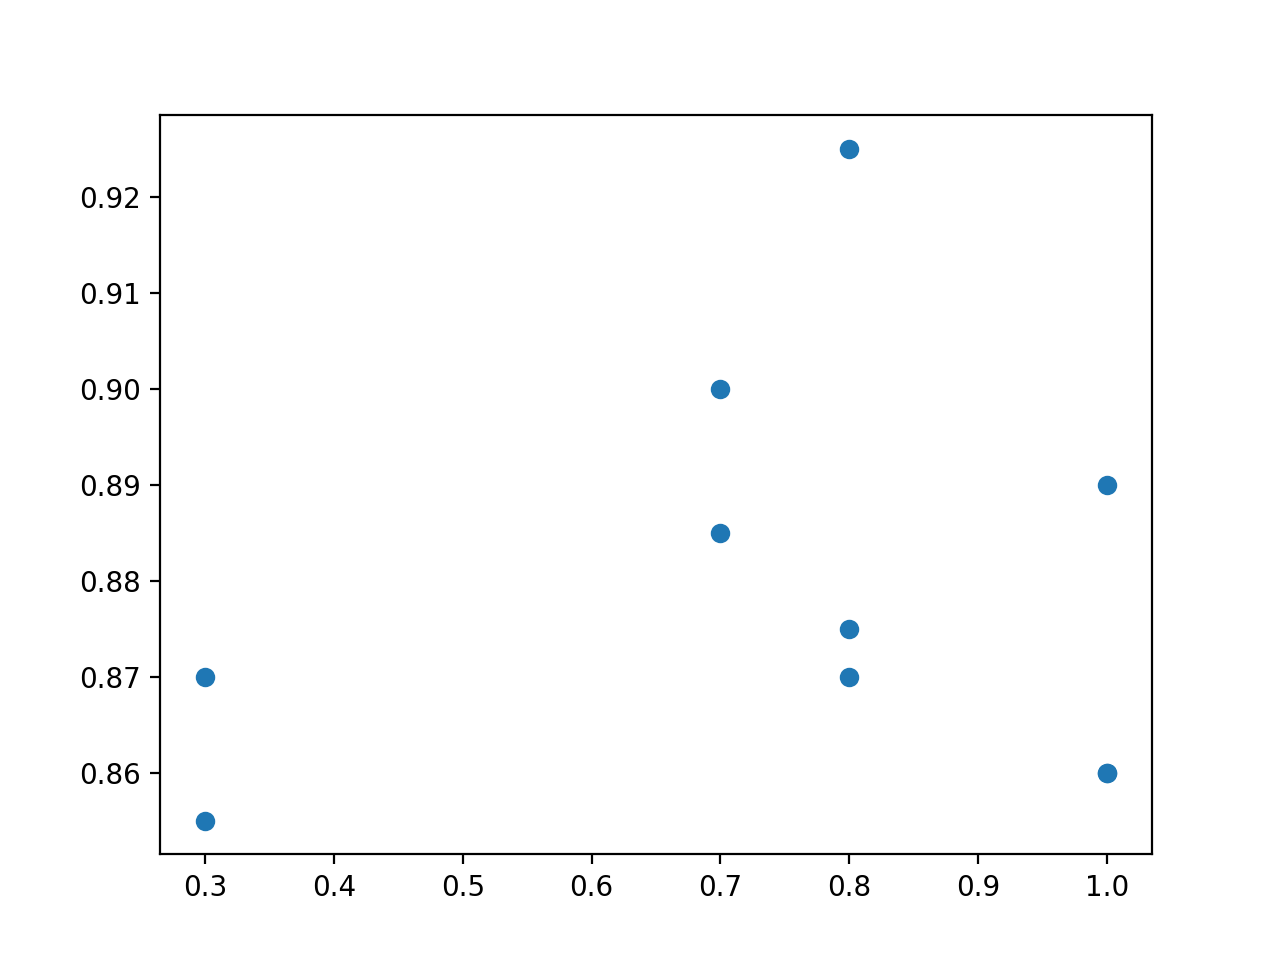

In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
L = [[0.85999999999999999, 1.0], [0.87, 0.80000000000000004], [0.90000000000000002, 0.70000000000000007], [0.88500000000000001, 0.70000000000000007], [0.875, 0.80000000000000004], [0.92500000000000004, 0.80000000000000004], [0.85999999999999999, 1.0], [0.87, 0.30000000000000004], [0.89000000000000001, 1.0], [0.85499999999999998, 0.30000000000000004]]
L1 = []
L2 = []
for i in L:
    L1.append(i[0])
    L2.append(i[1])
plt.figure()
plt.plot(L2,L1,'o')

In [18]:
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
kf = KFold(n=len(dataset.target), n_folds=10, shuffle=True, random_state=None)
l = []
count=0
for train_index, test_index in kf:
    docs_train, target_train = np.array(dataset.data)[train_index], np.array(dataset.target)[train_index]
    docs_test, target_test = np.array(dataset.data)[test_index], np.array(dataset.target)[test_index]
    s = 0
    L=[]
    for i in np.arange(1,7):
        Tfidf = TfidfVectorizer(min_df=0.01, max_df=0.78, ngram_range = (1,i),analyzer ='word')
        Tfidf.fit(docs_train)
        Xtrain = Tfidf.transform(docs_train)
        Xtest = Tfidf.transform(docs_test)
        clf = LinearSVC(C = 1, random_state=0)
        clf.fit(Xtrain, target_train)
        if s <= clf.score(Xtest, target_test):
            s = clf.score(Xtest, target_test)
            L.append([s,i])
    l.append(L[-1])
print(l)

[[0.91000000000000003, 3], [0.92000000000000004, 6], [0.875, 2], [0.88, 2], [0.84499999999999997, 6], [0.85499999999999998, 2], [0.89000000000000001, 6], [0.84999999999999998, 1], [0.85499999999999998, 5], [0.85499999999999998, 4]]


<IPython.core.display.Javascript object>


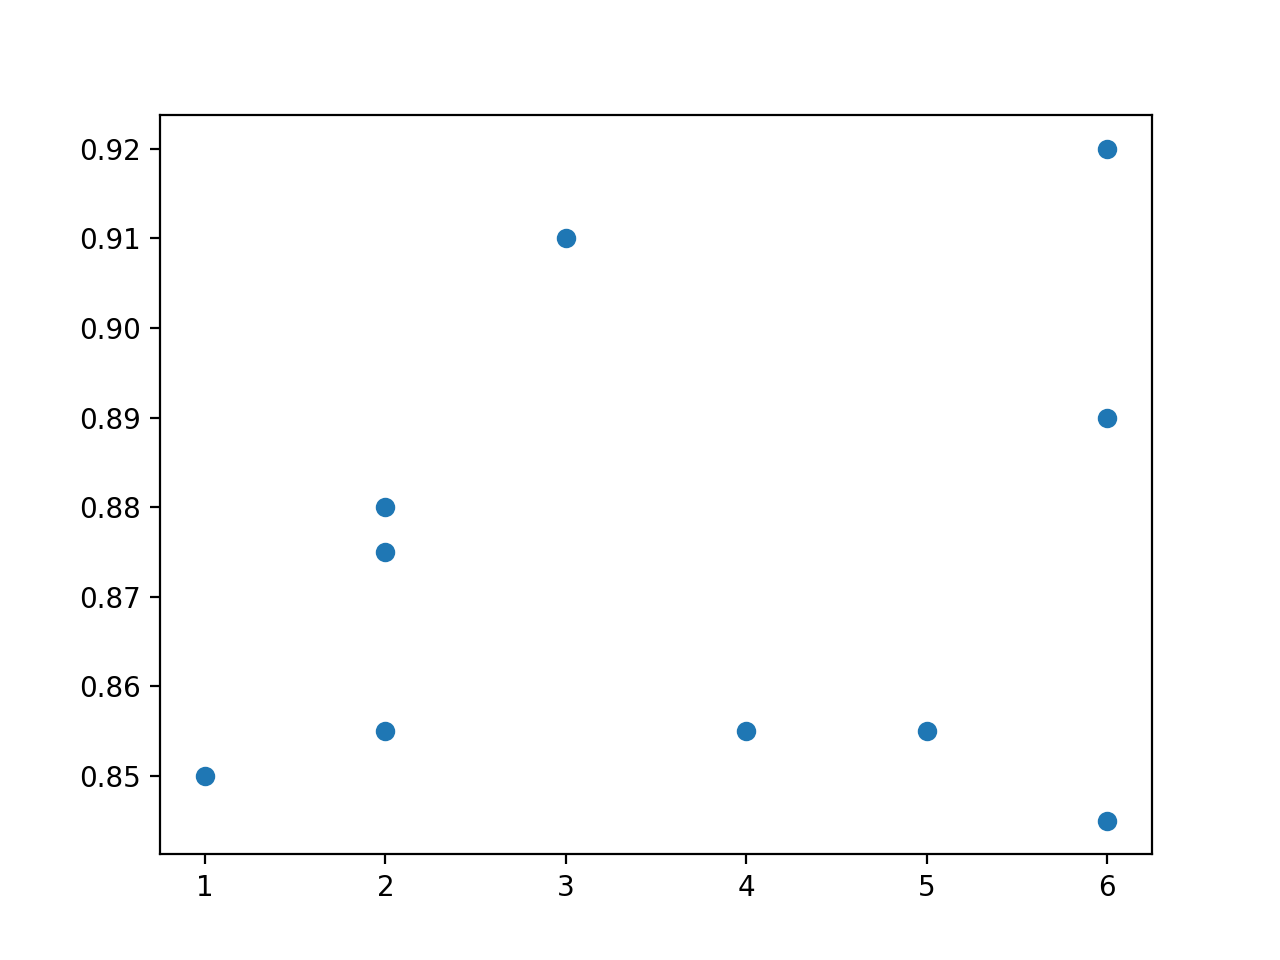

In [19]:
%matplotlib notebook
from matplotlib import pyplot as plt
L = [[0.91000000000000003, 3], [0.92000000000000004, 6], [0.875, 2], [0.88, 2], [0.84499999999999997, 6], [0.85499999999999998, 2], [0.89000000000000001, 6], [0.84999999999999998, 1], [0.85499999999999998, 5], [0.85499999999999998, 4]]
L1 = []
L2 = []
for i in L:
    L1.append(i[0])
    L2.append(i[1])
plt.figure()
plt.plot(L2,L1,'o')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(min_df=0.01, max_df=0.78, ngram_range = (1,2),analyzer ='word')
Tfidf.fit(docs_train)
Xtrain = Tfidf.transform(docs_train)
Xtest = Tfidf.transform(docs_test)
#print(Tfidf.get_feature_names())



In [4]:
#LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(Xtrain, target_train)

target_predicted = clf.predict(Xtest)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(cm)

             precision    recall  f1-score   support

        neg       0.90      0.88      0.89       254
        pos       0.88      0.89      0.89       246

avg / total       0.89      0.89      0.89       500

[[223  31]
 [ 26 220]]


In [5]:
#KNeighborsClassifier, find the best k which has largest accuracy rate
com=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,300,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, target_train)

    target_predicted = knn.predict(Xtest)

    cm = metrics.confusion_matrix(target_test, target_predicted)
#print(cm)

    com.append(((cm[0][0]+cm[1][1])/500,i))
maxk=0
k=0
for i in range(len(com)):
    if (com[i][0])>maxk:
        maxk=com[i][0]
        k=com[i][1]
print(k)
#The result is k=138

228


In [20]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 228) # or n_neighbors=300
knn.fit(Xtrain, target_train)

target_predicted = knn.predict(Xtest)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(cm)

             precision    recall  f1-score   support

        neg       0.77      0.84      0.80       254
        pos       0.82      0.74      0.78       246

avg / total       0.79      0.79      0.79       500

[[213  41]
 [ 63 183]]


In [15]:
#Find two incorrect example
#we use example 7 and example 2 in our report
#SVC
example=7
target_predicted = clf.predict(Xtest[example])
print("prediction: ",target_predicted)
print("true value: ", target_test[example])

prediction:  [0]
true value:  1


In [16]:
#KNN
target_predicted = knn.predict(Xtest[example])
print("prediction: ",target_predicted)
print("true value: ", target_test[example])
#print the original review
print(docs_test[example])

prediction:  [1]
true value:  1
b'gothic murder-mystery yarns are not a new conceit . \nin fact , they\'ve been around in books and on film for many , many years . \nwithout the proper handling , they come off as old-fashioned , bland , and outdated . \n " the gift , " directed by sam raimi , is a tried-and-true effort that surprises very little , and includes everything from a wide array of suspects and red herrings , to mansions in the deep south with moss trees out front , to the eventual discovery of a waterlogged corpse found in a nearby pond . \nit\'s fairly obvious who the killer is ; in fact , i predicted who it would be before the movie began and was correct in my preliminary suspicions . \nthe film ultimately shouldn\'t work , but it does , thanks to a sparkling cast that fills each character with so many memorable nuances , the most fun to be had is in simply watching the people interact with each other . \nannie wilson ( cate blanchett ) is a recently widowed mother of thre

Now we want to discuss whether the models have better prediction when the length of review is longer. We sort the test datatest by the length of review, and run Linear-SVC and KNN obtained from above.

In [17]:
a=[]
b=[] #true
c=[] #SVC
d=[] #KNN
e=[] #1 is correct, 0 is not SVC
f=[] #1 is correct, 0 is not KNN
n=[]
my_test=[]
def getKey(item):
    return item[1]

for i in range(500):
    a.append((len(docs_test[i]),i))

a.sort()
for i in range(500):
    my_test.append(docs_test[a[i][1]])
    b.append(target_test[a[i][1]])
    n.append(a[i][0])
my_test=Tfidf.transform(my_test)
for i in range(500):
    target_predicted = clf.predict(my_test[i])
    c.append(target_predicted)
    if c[i]==b[i]:
        e.append(1)
    elif c[i]!=b[i]:
        e.append(0)
    target_predicted = knn.predict(my_test[i])
    d.append(target_predicted)
    if d[i]==b[i]:
        f.append(1)
    elif d[i]!=b[i]:
        f.append(0)

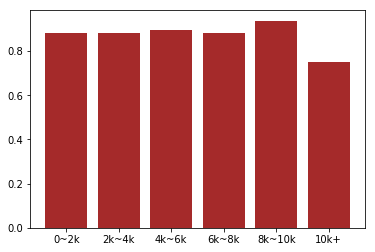

In [18]:
#show the plot of length of review vs accuracy rate using Linear SVC
import matplotlib.pyplot as plt
#plt.plot(n,e,'ro')
#plt.show()
count=[0]*6
_2000=0
_4000=0
_6000=0
_8000=0
_10000=0
_10000_=0
for i in range(500):
    if n[i]<=2000:
        count[0]=count[0]+e[i]
        _2000+=1
    elif n[i]<=4000:
        count[1]=count[1]+e[i]
        _4000+=1
    elif n[i]<=6000:
        count[2]=count[2]+e[i]
        _6000+=1
    elif n[i]<=8000:
        count[3]=count[3]+e[i]
        _8000+=1
    elif n[i]<=10000:
        count[4]=count[4]+e[i]
        _10000+=1
    elif n[i]>10000:
        count[5]=count[5]+e[i]
        _10000_+=1
count[0]=count[0]/_2000
count[1]=count[1]/_4000
count[2]=count[2]/_6000
count[3]=count[3]/_8000
count[4]=count[4]/_10000
count[5]=count[5]/_10000_
x=[1,2,3,4,5,6]
lengofword=['0~2k','2k~4k','4k~6k','6k~8k','8k~10k','10k+']
plt.xticks(x,lengofword)
plt.bar(x,count,align='center',color='brown')
plt.show()

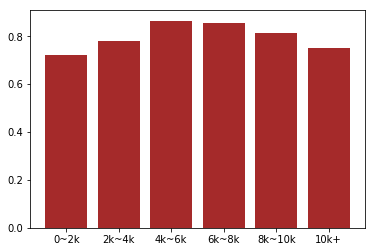

In [19]:
#show the plot of length of review vs accuracy rate using KNN
import matplotlib.pyplot as plt
#plt.plot(n,e,'ro')
#plt.show()
count=[0]*6
_2000=0
_4000=0
_6000=0
_8000=0
_10000=0
_10000_=0
for i in range(500):
    if n[i]<=2000:
        count[0]=count[0]+f[i]
        _2000+=1
    elif n[i]<=4000:
        count[1]=count[1]+f[i]
        _4000+=1
    elif n[i]<=6000:
        count[2]=count[2]+f[i]
        _6000+=1
    elif n[i]<=8000:
        count[3]=count[3]+f[i]
        _8000+=1
    elif n[i]<=10000:
        count[4]=count[4]+f[i]
        _10000+=1
    elif n[i]>10000:
        count[5]=count[5]+f[i]
        _10000_+=1
count[0]=count[0]/_2000
count[1]=count[1]/_4000
count[2]=count[2]/_6000
count[3]=count[3]/_8000
count[4]=count[4]/_10000
count[5]=count[5]/_10000_
x=[1,2,3,4,5,6]
lengofword=['0~2k','2k~4k','4k~6k','6k~8k','8k~10k','10k+']
plt.xticks(x,lengofword)
plt.bar(x,count,align='center',color='brown')
plt.show()

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold

Xtrain = Xtrain.toarray()

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(Xtrain, target_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

(10774,)


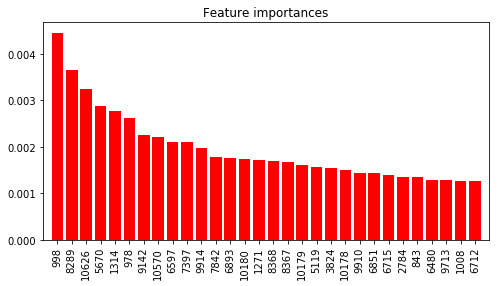

In [14]:
print(indices.shape)
# 30 Xtrain.shape[1]
showNum = 30
test = indices[:showNum]

plt.close('all')
plt.figure(figsize=(8,4))
plt.title("Feature importances")
plt.bar(range(showNum), importances[test],
       color="r", align="center")
plt.xticks(range(showNum), test, rotation='vertical')
plt.xlim([-1, showNum])
plt.show()

In [15]:
# Print the feature ranking
print("Feature ranking:")

for f in range(showNum):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 998 (0.004455)
2. feature 8289 (0.003659)
3. feature 10626 (0.003255)
4. feature 5670 (0.002873)
5. feature 1314 (0.002774)
6. feature 978 (0.002628)
7. feature 9142 (0.002264)
8. feature 10570 (0.002219)
9. feature 6597 (0.002111)
10. feature 7397 (0.002105)
11. feature 9914 (0.001987)
12. feature 7842 (0.001790)
13. feature 6893 (0.001759)
14. feature 10180 (0.001735)
15. feature 1271 (0.001712)
16. feature 8368 (0.001703)
17. feature 8367 (0.001670)
18. feature 10179 (0.001618)
19. feature 5119 (0.001564)
20. feature 3824 (0.001538)
21. feature 10178 (0.001497)
22. feature 9910 (0.001442)
23. feature 6851 (0.001434)
24. feature 6715 (0.001399)
25. feature 2784 (0.001359)
26. feature 843 (0.001345)
27. feature 6480 (0.001292)
28. feature 9713 (0.001286)
29. feature 1008 (0.001276)
30. feature 6712 (0.001272)


Try Scikit-learn manifold

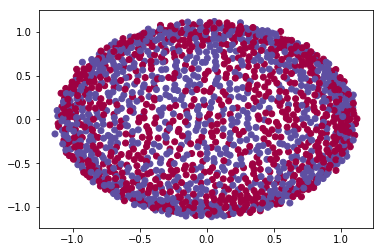

In [22]:
mds = manifold.MDS(n_components = 2, max_iter=1000, n_init=2)
Y = mds.fit_transform(Xtrain)
#ax = plt.figure().add_subplot(111, projection = '3d')
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

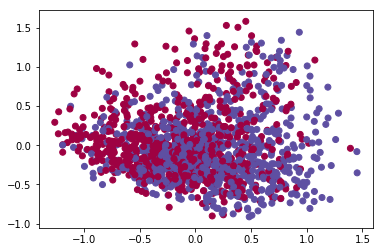

In [23]:
iso = manifold.Isomap(n_components = 2, n_neighbors = 500, eigen_solver = 'dense')
Y = iso.fit_transform(Xtrain)
#Y = mds.fit(Xtrain)
#ax = plt.figure().add_subplot(111,projection = '3d')
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
#plt.axis('tight')

plt.show()

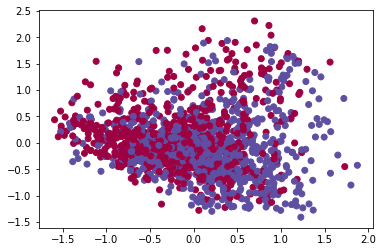

In [24]:
se = manifold.SpectralEmbedding(n_components = 2, n_neighbors = 600)
Y = se.fit_transform(Xtrain)
#Y = mds.fit(Xtrain)
#ax = plt.figure().add_subplot(111,projection = '3d')
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

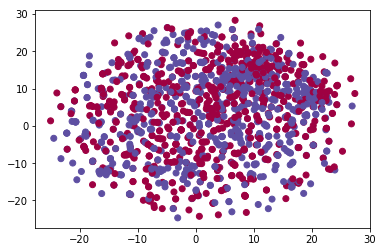

In [25]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0)
Y = tsne.fit_transform(Xtrain)
#Y = mds.fit(Xtrain)
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c= target_train, cmap=plt.cm.Spectral)
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

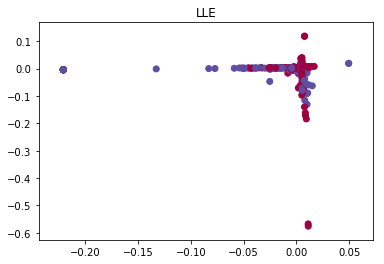

In [26]:
methods = ['standard', 'hessian', 'modified']
labels = ['LLE', 'Hessian LLE', 'Modified LLE']

Y = manifold.LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                    eigen_solver='auto',
                                    method=methods[0]).fit_transform(Xtrain)
#ax = plt.figure().add_subplot(111)
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c = target_train, cmap=plt.cm.Spectral)
plt.title("%s" % (labels[0]))
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

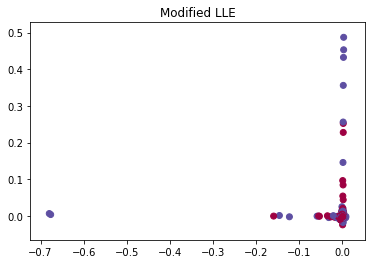

In [28]:
methods = ['standard', 'hessian', 'modified']
labels = ['LLE', 'Hessian LLE', 'Modified LLE']

Y = manifold.LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                    eigen_solver='auto',
                                    method=methods[2]).fit_transform(Xtrain)
#ax = plt.figure().add_subplot(111)
ax = plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c = target_train, cmap=plt.cm.Spectral)
plt.title("%s" % (labels[2]))
#ax.gca().xaxis.set_major_formatter(NullFormatter())
#ax.gca().yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

(1500, 30)


<IPython.core.display.Javascript object>


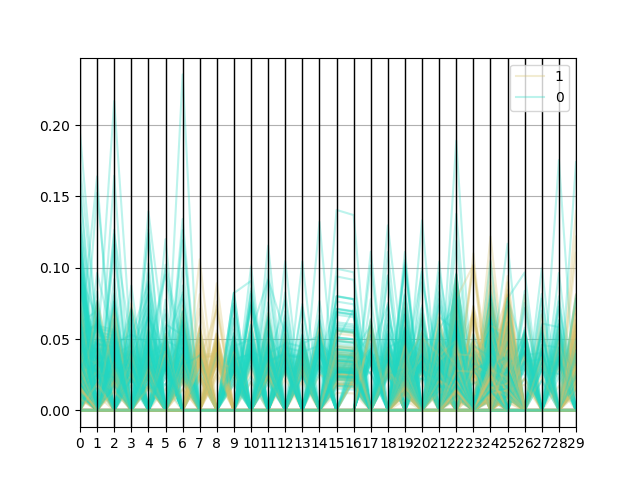

In [47]:
%matplotlib notebook

featured_X = []
featureNum = 30

for i in range(featureNum):
    if len(featured_X) == 0:
        featured_X = Xtrain[:,indices[i]]
    else:
        featured_X = np.vstack((featured_X, Xtrain[:,indices[i]]))
featured_X = featured_X.transpose()
print(featured_X.shape)

import pandas as pd
plt.figure()
mer = pd.DataFrame(featured_X)
mer['type'] = target_train
pd.plotting.parallel_coordinates(mer,'type',alpha=0.3)

(1500, 2)


<IPython.core.display.Javascript object>


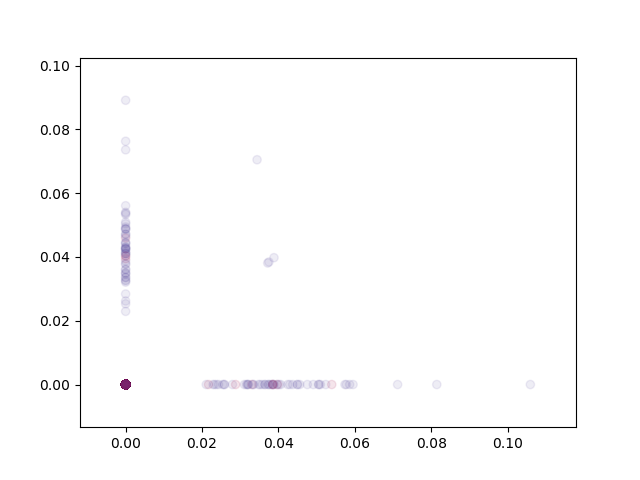

In [48]:
featured_X = Xtrain[:,indices[7]]
featured_X = np.vstack((featured_X, Xtrain[:,indices[8]]))
featured_X = featured_X.transpose()
print(featured_X.shape)

ax = plt.figure()
plt.scatter(featured_X[:, 0], featured_X[:, 1], c= target_train, cmap=plt.cm.Spectral, alpha=0.1)
plt.axis('tight')

plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **